In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [32]:
buzzfeed_real = pd.read_csv('./buzzfeed/BuzzFeed_real_news_content.csv')
buzzfeed_fake = pd.read_csv('./buzzfeed/BuzzFeed_fake_news_content.csv')

In [34]:
# merging both the dataframes
buzzfeed_df = pd.concat([buzzfeed_real, buzzfeed_fake])
del buzzfeed_real, buzzfeed_fake

In [35]:
buzzfeed_df.shape

(182, 12)

In [36]:
# extracting type of news(label) from the id and adding it as a column
buzzfeed_df['type'] = buzzfeed_df['id'].apply(lambda x: x.split('_')[0])

In [37]:
buzzfeed_df.describe()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,type
count,182,182,182,174,172,141,174,133,25,172,170,182,182
unique,182,178,178,171,166,90,28,118,25,169,168,171,2
top,Real_1-Webpage,CNN’s Post-Debate Rigged Poll Busted…Here Are ...,We’re shocked — SHOCKED — to learn that CNN’s ...,http://eaglerising.com/36847/clinton-foundatio...,http://static.politico.com/da/f5/44342c424c68b...,Terresa Monroe-hamilton,http://politi.co,{'$date': 1474588800000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://static.politico.com/da/f5/44342c424c68b...,http://eaglerising.com/36847/clinton-foundatio...,{},Real
freq,1,2,2,2,3,8,32,5,1,2,2,8,91


In [38]:
# selecting only inportant features
buzzfeed_df = buzzfeed_df[['id', 'title', 'text', 'source', 'type', 'images', 'movies']]

In [11]:
# converting momovies and images as bool, i.e. 1 if it contains link and 0 if it doesnt
buzzfeed_df['movies'] = buzzfeed_df['movies'].apply(lambda x: 1 if not pd.isna(x) else 0)
buzzfeed_df['images'] = buzzfeed_df['images'].apply(lambda x: 1 if not pd.isna(x) else 0)


In [12]:
buzzfeed_df.head()

,id,title,text,source,type,images,movies
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com,Real,1,0
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws,Real,1,0
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com,Real,1,1
3,Real_12-Webpage,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,http://politi.co,Real,1,0
4,Real_13-Webpage,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,http://abcn.ws,Real,1,0


### Top 5 sources that publish Real news

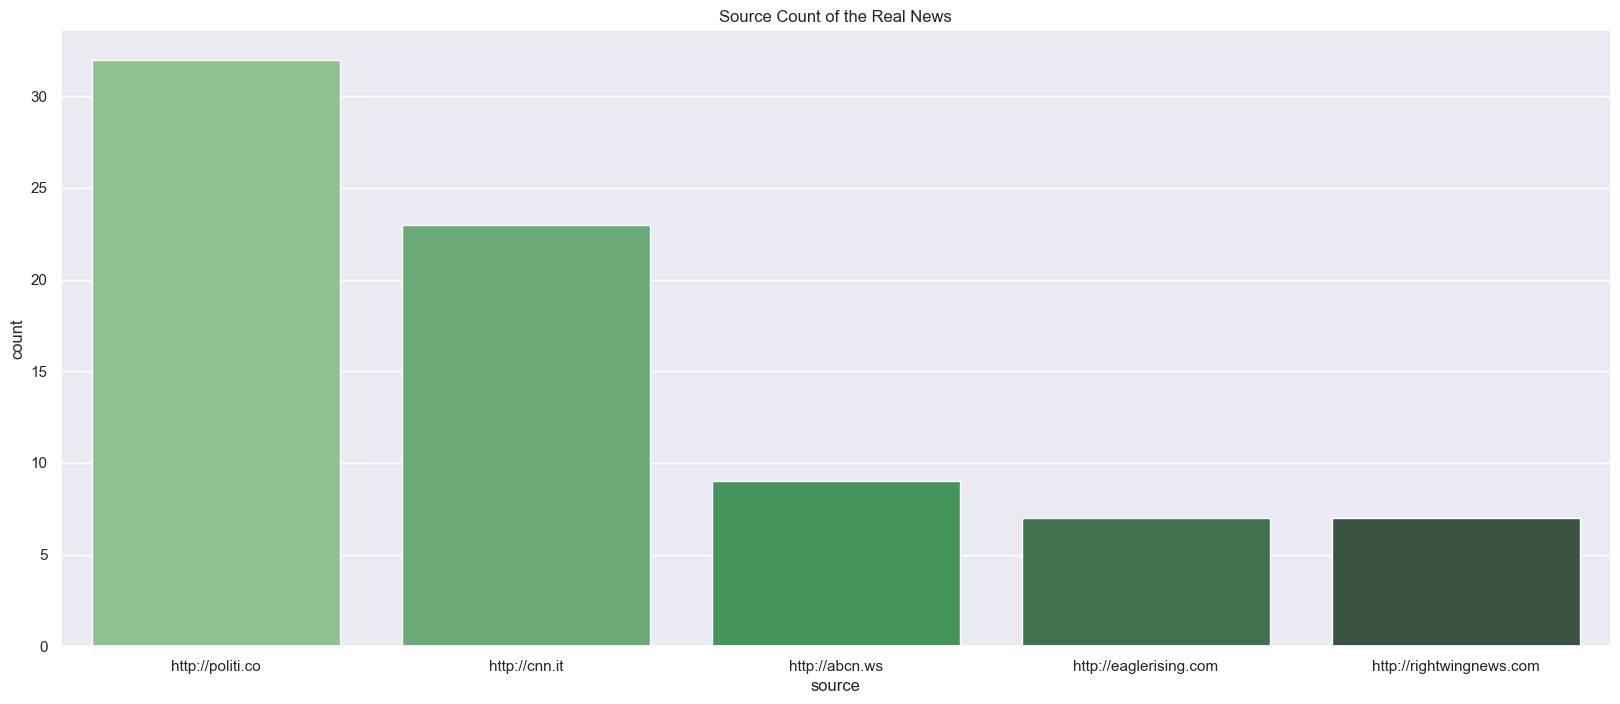

In [50]:

buzzfeed_real = buzzfeed_df[buzzfeed_df['type'] == 'Real']
source_counts = buzzfeed_real['source'].value_counts().sort_values(ascending=False).head(5)
# print(buzzfeed_real)
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
plt.title('Source Count of the Real News')
sns.barplot( y=source_counts.values, x=source_counts.index, palette='Greens_d')
plt.ylabel('count')
plt.xlabel('source')
plt.show()


### Which sources generally publishes Fake News

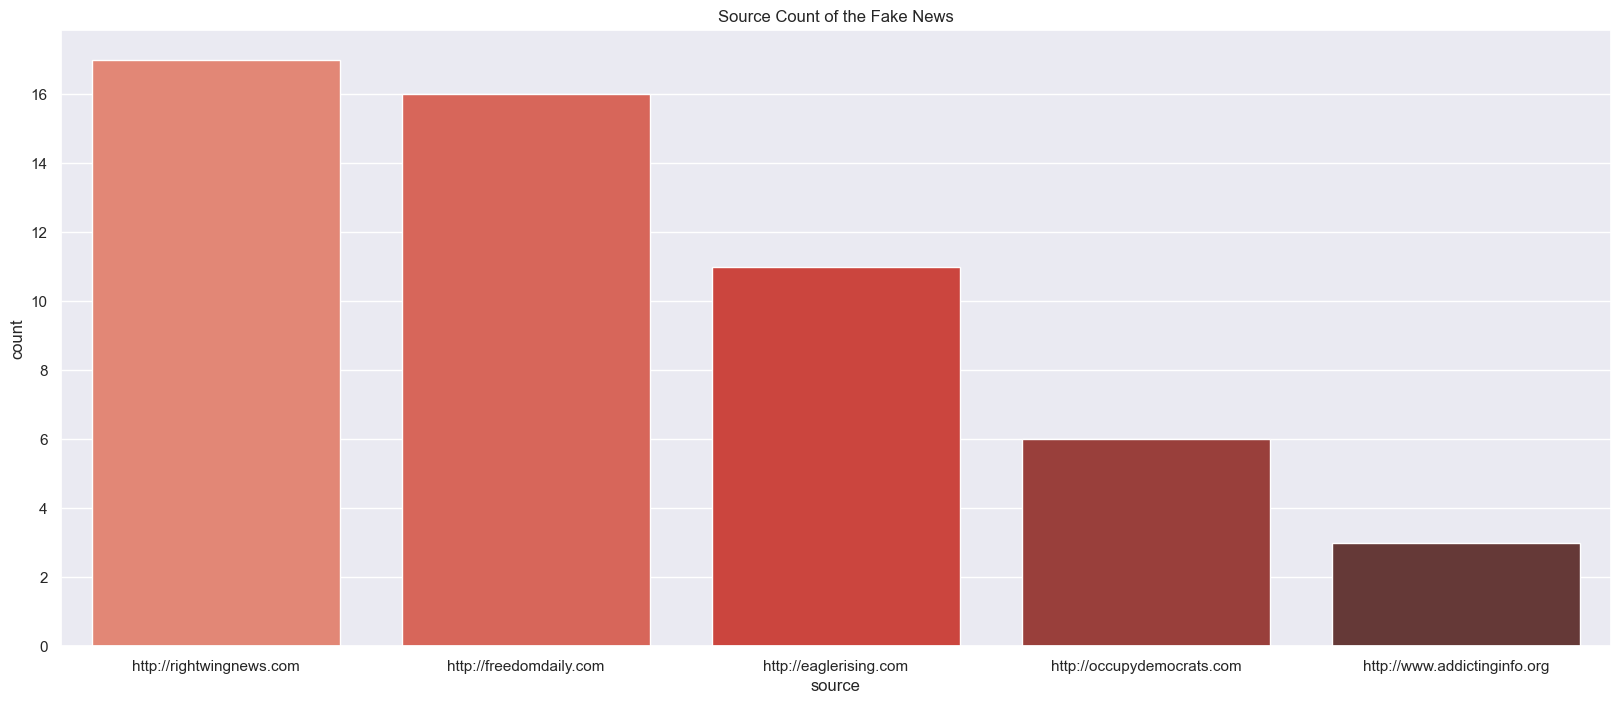

In [51]:

buzzfeed_fake = buzzfeed_df[buzzfeed_df['type'] == 'Fake']
source_counts = buzzfeed_fake['source'].value_counts().sort_values(ascending=False).head(5)
# print(buzzfeed_real)
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
plt.title('Source Count of the Fake News')
sns.barplot( y=source_counts.values, x=source_counts.index, palette='Reds_d')
plt.ylabel('count')
plt.xlabel('source')
plt.show()


### Some Common sources that publish both Real and Fake News

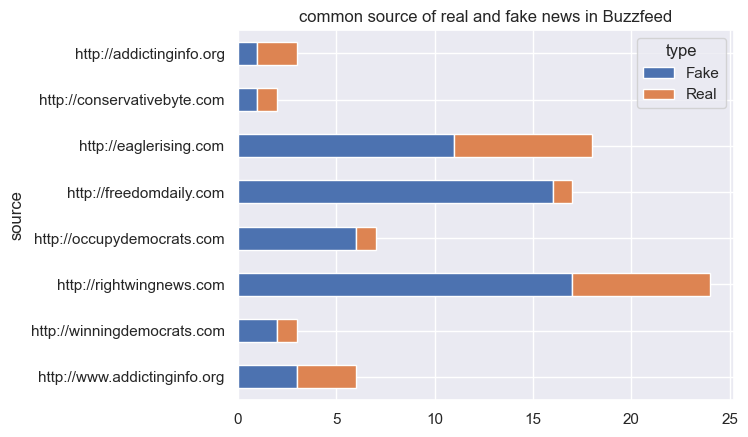

In [52]:
common_source = set(buzzfeed_real['source']).intersection(set(buzzfeed_fake['source']))
common_source_df = buzzfeed_df[buzzfeed_df['source'].isin(common_source)]

source_type_counts = pd.crosstab(common_source_df['source'], common_source_df['type'])
source_type_counts.plot(kind='barh', stacked=True)
plt.title("common source of real and fake news in Buzzfeed")
plt.gca().invert_yaxis()
plt.show()

### How many of them include movie i.e. a video link?

In [ ]:

movies_counts = pd.crosstab(buzzfeed_df['movies'], buzzfeed_df['type'])
print(movies_counts)
movies_counts.plot(kind='bar', stacked=True)
plt.xlabel("Movies linked to news")
plt.ylabel("counts")
plt.title("News category wise movies")
plt.show()

In [54]:
# 2.1.5 Do sources include images in all the news as images provide visual cues?

images_counts = pd.crosstab(buzzfeed_df['images'], buzzfeed_df['type'])
images_counts.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='images'>